# Adaptive LDA Base Rule

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import os
import glob

from Rules import GameRules
from LDA_adaptive import aLDA
from LDA_adaptive import print_array, load_data

## Base Rule

In [2]:
all_IDs = ["ID#31127011_2WProsthUse", "ID#31180011_2WProsthUse", "ID#32068222_2WProsthUse", 
               "ID#32098021_2WProsthUse", "ID#32132721_2WProsthUse_KW", "ID#32136722_2WProsthUse",
               "ID#32195432_2WProsthUse", "ID#51013322_2WProsthUse", "ID#51048532_2WProsthUse", 
               "ID#52054922_2WProsthUse"]

""" Read in all In the Zone game data for one subject"""
Gamedata = load_data("ID#52054922_2WProsthUse")
print(f"Total games: {len(Gamedata)}")

Game data paths:
/home/androo/Documents/Coapt/Code/../Data/ID#52054922_2WProsthUse/VirtualGameData/VirtualArmGames_-2_18_2021_9_58_27.csv
/home/androo/Documents/Coapt/Code/../Data/ID#52054922_2WProsthUse/VirtualGameData/VirtualArmGames_-2_19_2021_9_56_34.csv
/home/androo/Documents/Coapt/Code/../Data/ID#52054922_2WProsthUse/VirtualGameData/VirtualArmGames_-2_20_2021_9_17_42.csv
/home/androo/Documents/Coapt/Code/../Data/ID#52054922_2WProsthUse/VirtualGameData/VirtualArmGames_-2_22_2021_9_52_6.csv
/home/androo/Documents/Coapt/Code/../Data/ID#52054922_2WProsthUse/VirtualGameData/VirtualArmGames_-2_24_2021_10_26_10.csv
/home/androo/Documents/Coapt/Code/../Data/ID#52054922_2WProsthUse/VirtualGameData/VirtualArmGames_-2_25_2021_9_51_35.csv
/home/androo/Documents/Coapt/Code/../Data/ID#52054922_2WProsthUse/VirtualGameData/VirtualArmGames_-2_26_2021_9_15_54.csv
/home/androo/Documents/Coapt/Code/../Data/ID#52054922_2WProsthUse/VirtualGameData/VirtualArmGames_-2_27_2021_9_20_31.csv
/home/androo/Do

First virtual game data

In [3]:
unadapted_err = []
adapted_err = []

class_data = Gamedata[0][['class', 'targetClass', 'emgChan1', 'emgChan2', 'emgChan3', 'emgChan4', 'emgChan5', 'emgChan6', 'emgChan7', 'emgChan8']].to_numpy()

X = class_data[:, 2:]
y = class_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

X = adapt_sample[:, :-1]
y = adapt_sample[:, -1]

lda = aLDA()
_, _ = lda.fit(X, y, flag=0)

X = test_sample[:, :-1]
y = test_sample[:, -1]
lda_preds = lda.predict(X)

# print_array(y)
# print_array(lda_preds)

print("Error Rates")
print(f"First game unadapted: {np.around((y!=lda_preds).sum() / y.size, 2) * 100}%")

unadapted_err.append(np.around((y!=lda_preds).sum() / y.size, 2) * 100)

rules = GameRules()
new_data = rules.base_rule(Gamedata[0])
new_data = np.vstack((new_data))[:,:-1]

X = new_data[:, 2:]
y = new_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

X = adapt_sample[:, :-1]
y = adapt_sample[:, -1]

alda = aLDA()
prev_means, prev_covs = alda.fit(X, y, flag=0)

X = test_sample[:, :-1]
y = test_sample[:, -1]
alda_preds = alda.predict(X)

# print_array(y)
# print_array(alda_preds)
print(f"First game w/ rules: {np.around((y!=alda_preds).sum() / y.size, 2) * 100}%")

adapted_err.append(np.around((y!=alda_preds).sum() / y.size, 2) * 100)

Error Rates
First game unadapted: 31.0%
First game w/ rules: 31.0%


Second virtual game data

In [4]:
class_data = Gamedata[1][['class', 'targetClass', 'emgChan1', 'emgChan2', 'emgChan3', 'emgChan4', 'emgChan5', 'emgChan6', 'emgChan7', 'emgChan8']].to_numpy()

X = class_data[:, 2:]
y = class_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

"""Test without adapting"""
X = test_sample[:, :-1]
y = test_sample[:, -1]

preds = lda.predict(X)
print(f"Second game unadapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

unadapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

"""Test with adaptation"""
rules = GameRules()
new_data = rules.base_rule(Gamedata[1])
new_data = np.vstack((new_data))[:,:-1]

X = new_data[:, 2:]
y = new_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

X = adapt_sample[:, :-1]
y = adapt_sample[:, -1]

classes = np.unique(y)
means = dict()
covs = dict()

for c in classes:
    X_c = X[y == c]
    means[c] = np.mean(X_c, axis=0)
    covs[c] = np.cov(X_c, rowvar=False)

temp_covs = np.zeros((8,8))
for key in prev_means:
    meanMat = prev_means[key]
    covMat = prev_covs[key]
    temp_covs += covMat
    # N = len(means[key])
    N = len(classes)
    cur_feat = means[key]
    prev_means[key], prev_covs[key] = alda.updateMeanAndCov(meanMat, covMat, N, cur_feat)

temp_covs = temp_covs / len(classes)

prev_means, prev_covs = alda.fit(X, y, classmeans=prev_means, covariance=temp_covs, flag=1)

X = test_sample[:, :-1]
y = test_sample[:, -1]
preds = alda.predict(X)
print(f"Second game adapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

adapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)


Second game unadapted: 54.0%
Second game adapted: 46.0%


Third virtual game data

In [5]:
class_data = Gamedata[2][['class', 'targetClass', 'emgChan1', 'emgChan2', 'emgChan3', 'emgChan4', 'emgChan5', 'emgChan6', 'emgChan7', 'emgChan8']].to_numpy()

X = class_data[:, 2:]
y = class_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

"""Test without adapting"""
X = test_sample[:, :-1]
y = test_sample[:, -1]

preds = lda.predict(X)
print(f"Third game unadapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

unadapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

"""Test with adaptation"""
rules = GameRules()
new_data = rules.base_rule(Gamedata[2])
new_data = np.vstack((new_data))[:,:-1]

X = new_data[:, 2:]
y = new_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

X = adapt_sample[:, :-1]
y = adapt_sample[:, -1]

classes = np.unique(y)
means = dict()
covs = dict()

for c in classes:
    X_c = X[y == c]
    means[c] = np.mean(X_c, axis=0)
    covs[c] = np.cov(X_c, rowvar=False)

temp_covs = np.zeros((8,8))
for key in prev_means:
    meanMat = prev_means[key]
    covMat = prev_covs[key]
    temp_covs += covMat
    # N = len(means[key])
    N = len(classes)
    cur_feat = means[key]
    prev_means[key], prev_covs[key] = alda.updateMeanAndCov(meanMat, covMat, N, cur_feat)

temp_covs = temp_covs / len(classes)

prev_means, prev_covs = alda.fit(X, y, classmeans=prev_means, covariance=temp_covs, flag=1)

X = test_sample[:, :-1]
y = test_sample[:, -1]
preds = alda.predict(X)
print(f"Third game adapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

adapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)


Third game unadapted: 48.0%
Third game adapted: 43.0%


Fourth virtual game data

In [6]:
class_data = Gamedata[3][['class', 'targetClass', 'emgChan1', 'emgChan2', 'emgChan3', 'emgChan4', 'emgChan5', 'emgChan6', 'emgChan7', 'emgChan8']].to_numpy()

X = class_data[:, 2:]
y = class_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

"""Test without adapting"""
X = test_sample[:, :-1]
y = test_sample[:, -1]

preds = lda.predict(X)
print(f"Fourth game unadapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

unadapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

"""Test with adaptation"""
rules = GameRules()
new_data = rules.base_rule(Gamedata[3])
new_data = np.vstack((new_data))[:,:-1]

X = new_data[:, 2:]
y = new_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

X = adapt_sample[:, :-1]
y = adapt_sample[:, -1]

classes = np.unique(y)
means = dict()
covs = dict()

for c in classes:
    X_c = X[y == c]
    means[c] = np.mean(X_c, axis=0)
    covs[c] = np.cov(X_c, rowvar=False)

temp_covs = np.zeros((8,8))
for key in prev_means:
    meanMat = prev_means[key]
    covMat = prev_covs[key]
    temp_covs += covMat
    # N = len(means[key])
    N = len(classes)
    cur_feat = means[key]
    prev_means[key], prev_covs[key] = alda.updateMeanAndCov(meanMat, covMat, N, cur_feat)

temp_covs = temp_covs / len(classes)

prev_means, prev_covs = alda.fit(X, y, classmeans=prev_means, covariance=temp_covs, flag=1)

X = test_sample[:, :-1]
y = test_sample[:, -1]
preds = alda.predict(X)
print(f"Fourth game adapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

adapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)


Fourth game unadapted: 40.0%
Fourth game adapted: 43.0%


Fifth virtual game data

In [7]:
class_data = Gamedata[4][['class', 'targetClass', 'emgChan1', 'emgChan2', 'emgChan3', 'emgChan4', 'emgChan5', 'emgChan6', 'emgChan7', 'emgChan8']].to_numpy()

X = class_data[:, 2:]
y = class_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

"""Test without adapting"""
X = test_sample[:, :-1]
y = test_sample[:, -1]

preds = lda.predict(X)
print(f"Fifth game unadapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

unadapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

"""Test with adaptation"""
rules = GameRules()
new_data = rules.base_rule(Gamedata[4])
new_data = np.vstack((new_data))[:,:-1]

X = new_data[:, 2:]
y = new_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

X = adapt_sample[:, :-1]
y = adapt_sample[:, -1]

classes = np.unique(y)
means = dict()
covs = dict()

for c in classes:
    X_c = X[y == c]
    means[c] = np.mean(X_c, axis=0)
    covs[c] = np.cov(X_c, rowvar=False)

temp_covs = np.zeros((8,8))
for key in prev_means:
    meanMat = prev_means[key]
    covMat = prev_covs[key]
    temp_covs += covMat
    # N = len(means[key])
    N = len(classes)
    cur_feat = means[key]
    prev_means[key], prev_covs[key] = alda.updateMeanAndCov(meanMat, covMat, N, cur_feat)

temp_covs = temp_covs / len(classes)

prev_means, prev_covs = alda.fit(X, y, classmeans=prev_means, covariance=temp_covs, flag=1)

X = test_sample[:, :-1]
y = test_sample[:, -1]
preds = alda.predict(X)
print(f"Fifth game adapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

adapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

Fifth game unadapted: 40.0%
Fifth game adapted: 34.0%


Sixth virtual game data

In [8]:
class_data = Gamedata[5][['class', 'targetClass', 'emgChan1', 'emgChan2', 'emgChan3', 'emgChan4', 'emgChan5', 'emgChan6', 'emgChan7', 'emgChan8']].to_numpy()

X = class_data[:, 2:]
y = class_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

"""Test without adapting"""
X = test_sample[:, :-1]
y = test_sample[:, -1]

preds = lda.predict(X)
print(f"Sixth game unadapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

unadapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

"""Test with adaptation"""
rules = GameRules()
new_data = rules.base_rule(Gamedata[5])
new_data = np.vstack((new_data))[:,:-1]

X = new_data[:, 2:]
y = new_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

X = adapt_sample[:, :-1]
y = adapt_sample[:, -1]

classes = np.unique(y)
means = dict()
covs = dict()

for c in classes:
    X_c = X[y == c]
    means[c] = np.mean(X_c, axis=0)
    covs[c] = np.cov(X_c, rowvar=False)

temp_covs = np.zeros((8,8))
for key in prev_means:
    meanMat = prev_means[key]
    covMat = prev_covs[key]
    temp_covs += covMat
    # N = len(means[key])
    N = len(classes)
    cur_feat = means[key]
    prev_means[key], prev_covs[key] = alda.updateMeanAndCov(meanMat, covMat, N, cur_feat)

temp_covs = temp_covs / len(classes)

prev_means, prev_covs = alda.fit(X, y, classmeans=prev_means, covariance=temp_covs, flag=1)

X = test_sample[:, :-1]
y = test_sample[:, -1]
preds = alda.predict(X)
print(f"Sixth game adapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

adapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

Sixth game unadapted: 47.0%
Sixth game adapted: 35.0%


Seventh virtual game data

In [9]:
class_data = Gamedata[6][['class', 'targetClass', 'emgChan1', 'emgChan2', 'emgChan3', 'emgChan4', 'emgChan5', 'emgChan6', 'emgChan7', 'emgChan8']].to_numpy()

X = class_data[:, 2:]
y = class_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

"""Test without adapting"""
X = test_sample[:, :-1]
y = test_sample[:, -1]

preds = lda.predict(X)
print(f"Seventh game unadapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

unadapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

"""Test with adaptation"""
rules = GameRules()
new_data = rules.base_rule(Gamedata[6])
new_data = np.vstack((new_data))[:,:-1]

X = new_data[:, 2:]
y = new_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

X = adapt_sample[:, :-1]
y = adapt_sample[:, -1]

classes = np.unique(y)
means = dict()
covs = dict()

for c in classes:
    X_c = X[y == c]
    means[c] = np.mean(X_c, axis=0)
    covs[c] = np.cov(X_c, rowvar=False)

temp_covs = np.zeros((8,8))
for key in prev_means:
    meanMat = prev_means[key]
    covMat = prev_covs[key]
    temp_covs += covMat
    # N = len(means[key])
    N = len(classes)
    cur_feat = means[key]
    prev_means[key], prev_covs[key] = alda.updateMeanAndCov(meanMat, covMat, N, cur_feat)

temp_covs = temp_covs / len(classes)

prev_means, prev_covs = alda.fit(X, y, classmeans=prev_means, covariance=temp_covs, flag=1)

X = test_sample[:, :-1]
y = test_sample[:, -1]
preds = alda.predict(X)
print(f"Seventh game adapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

adapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

Seventh game unadapted: 45.0%
Seventh game adapted: 30.0%


Eighth virtual game data

In [10]:
class_data = Gamedata[7][['class', 'targetClass', 'emgChan1', 'emgChan2', 'emgChan3', 'emgChan4', 'emgChan5', 'emgChan6', 'emgChan7', 'emgChan8']].to_numpy()

X = class_data[:, 2:]
y = class_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

"""Test without adapting"""
X = test_sample[:, :-1]
y = test_sample[:, -1]

preds = lda.predict(X)
print(f"Eighth game unadapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

unadapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

"""Test with adaptation"""
rules = GameRules()
new_data = rules.base_rule(Gamedata[6])
new_data = np.vstack((new_data))[:,:-1]

X = new_data[:, 2:]
y = new_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

X = adapt_sample[:, :-1]
y = adapt_sample[:, -1]

classes = np.unique(y)
means = dict()
covs = dict()

for c in classes:
    X_c = X[y == c]
    means[c] = np.mean(X_c, axis=0)
    covs[c] = np.cov(X_c, rowvar=False)

temp_covs = np.zeros((8,8))
for key in prev_means:
    meanMat = prev_means[key]
    covMat = prev_covs[key]
    temp_covs += covMat
    # N = len(means[key])
    N = len(classes)
    cur_feat = means[key]
    prev_means[key], prev_covs[key] = alda.updateMeanAndCov(meanMat, covMat, N, cur_feat)

temp_covs = temp_covs / len(classes)

prev_means, prev_covs = alda.fit(X, y, classmeans=prev_means, covariance=temp_covs, flag=1)

X = test_sample[:, :-1]
y = test_sample[:, -1]
preds = alda.predict(X)
print(f"Eighth game adapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

adapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

Eighth game unadapted: 46.0%
Eighth game adapted: 28.000000000000004%


Ninth virtual game data

In [11]:
class_data = Gamedata[8][['class', 'targetClass', 'emgChan1', 'emgChan2', 'emgChan3', 'emgChan4', 'emgChan5', 'emgChan6', 'emgChan7', 'emgChan8']].to_numpy()

X = class_data[:, 2:]
y = class_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

"""Test without adapting"""
X = test_sample[:, :-1]
y = test_sample[:, -1]

preds = lda.predict(X)
print(f"Ninth game unadapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

unadapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

"""Test with adaptation"""
rules = GameRules()
new_data = rules.base_rule(Gamedata[6])
new_data = np.vstack((new_data))[:,:-1]

X = new_data[:, 2:]
y = new_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

X = adapt_sample[:, :-1]
y = adapt_sample[:, -1]

classes = np.unique(y)
means = dict()
covs = dict()

for c in classes:
    X_c = X[y == c]
    means[c] = np.mean(X_c, axis=0)
    covs[c] = np.cov(X_c, rowvar=False)

temp_covs = np.zeros((8,8))
for key in prev_means:
    meanMat = prev_means[key]
    covMat = prev_covs[key]
    temp_covs += covMat
    # N = len(means[key])
    N = len(classes)
    cur_feat = means[key]
    prev_means[key], prev_covs[key] = alda.updateMeanAndCov(meanMat, covMat, N, cur_feat)

temp_covs = temp_covs / len(classes)

prev_means, prev_covs = alda.fit(X, y, classmeans=prev_means, covariance=temp_covs, flag=1)

X = test_sample[:, :-1]
y = test_sample[:, -1]
preds = alda.predict(X)
print(f"Ninth game adapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

adapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

Ninth game unadapted: 53.0%
Ninth game adapted: 28.000000000000004%


Tenth virtual game data

In [12]:
class_data = Gamedata[9][['class', 'targetClass', 'emgChan1', 'emgChan2', 'emgChan3', 'emgChan4', 'emgChan5', 'emgChan6', 'emgChan7', 'emgChan8']].to_numpy()

X = class_data[:, 2:]
y = class_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

"""Test without adapting"""
X = test_sample[:, :-1]
y = test_sample[:, -1]

preds = lda.predict(X)
print(f"Tenth game unadapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

unadapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

"""Test with adaptation"""
rules = GameRules()
new_data = rules.base_rule(Gamedata[6])
new_data = np.vstack((new_data))[:,:-1]

X = new_data[:, 2:]
y = new_data[:, 1]

np.random.seed(42)
combined = np.hstack((X,y.reshape(len(y),1)))
np.random.shuffle(combined)
adapt_sample = combined[:len(y)//2, :]
test_sample = combined[len(y)//2:, :]

X = adapt_sample[:, :-1]
y = adapt_sample[:, -1]

classes = np.unique(y)
means = dict()
covs = dict()

for c in classes:
    X_c = X[y == c]
    means[c] = np.mean(X_c, axis=0)
    covs[c] = np.cov(X_c, rowvar=False)

temp_covs = np.zeros((8,8))
for key in prev_means:
    meanMat = prev_means[key]
    covMat = prev_covs[key]
    temp_covs += covMat
    # N = len(means[key])
    N = len(classes)
    cur_feat = means[key]
    prev_means[key], prev_covs[key] = alda.updateMeanAndCov(meanMat, covMat, N, cur_feat)

temp_covs = temp_covs / len(classes)

prev_means, prev_covs = alda.fit(X, y, classmeans=prev_means, covariance=temp_covs, flag=1)

X = test_sample[:, :-1]
y = test_sample[:, -1]
preds = alda.predict(X)
print(f"Tenth game adapted: {np.around((y!=preds).sum() / y.size, 2) * 100}%")

adapted_err.append(np.around((y!=preds).sum() / y.size, 2) * 100)

Tenth game unadapted: 42.0%
Tenth game adapted: 27.0%


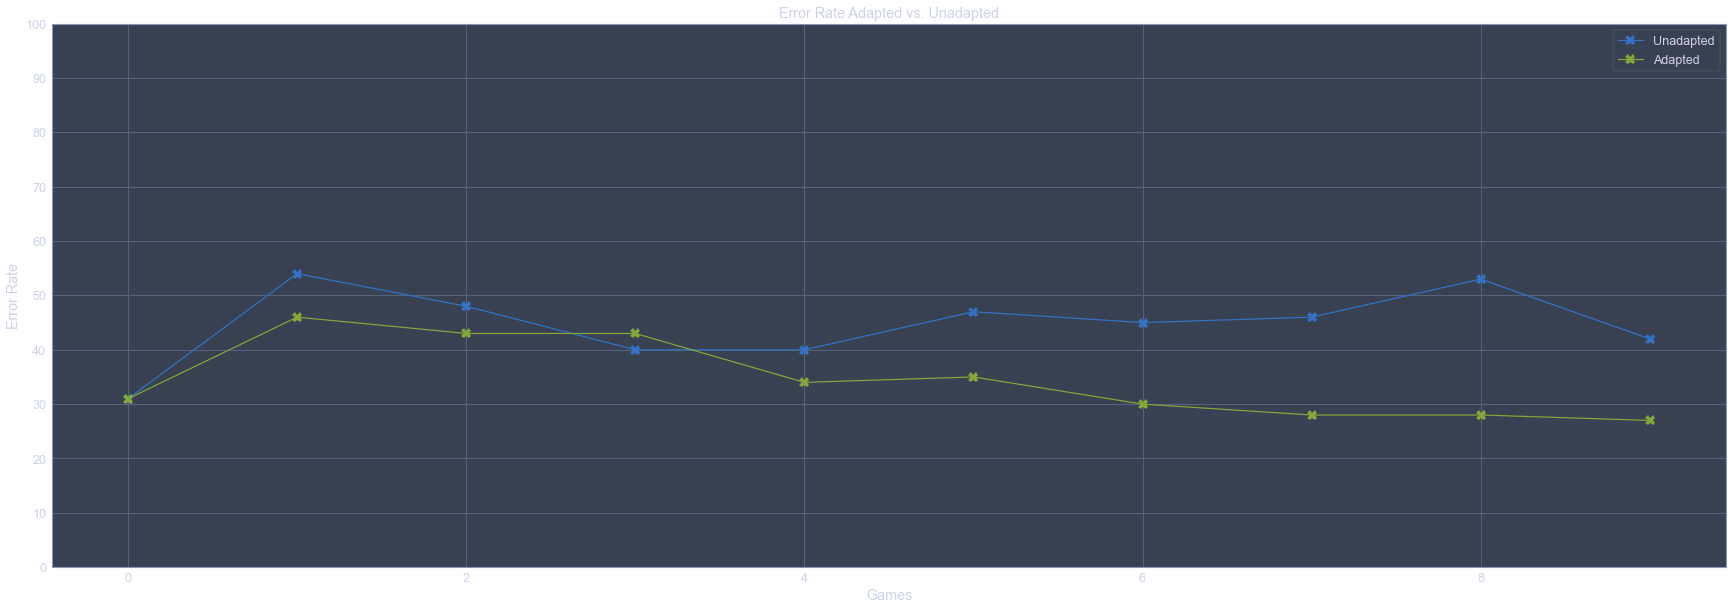

In [13]:
fig = plt.figure(figsize=(30, 10))
plt.plot(unadapted_err, label='Unadapted', marker='X', markersize=10)
plt.plot(adapted_err, label='Adapted', marker='X', markersize=10)
plt.title("Error Rate Adapted vs. Unadapted")
plt.ylabel("Error Rate")
plt.xlabel("Games")
plt.yticks(np.arange(0, 110, 10))
plt.legend()
plt.show()